In [24]:
# Import library yang diperlukan
import pandas as pd         # Untuk manipulasi data
import numpy as np          # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi
import seaborn as sns       # Untuk visualisasi yang lebih interaktif dan menarik

In [25]:
# 1. Memuat Dataset
# Dataset Titanic tersedia secara built-in di library Seaborn
titanic = sns.load_dataset('titanic')

# Menampilkan 5 baris pertama dataset untuk memahami struktur data
print("5 Baris Pertama Dataset Titanic:")
print(titanic.head())
print(titanic.tail())


# Buat kolom baru 'sex_numeric'
# Ubah 'male' menjadi 1 dan 'female' menjadi 0
titanic['sex_numeric'] = titanic['sex'].map({'male': 1, 'female': 0})

# Tampilkan beberapa baris pertama untuk verifikasi
print(titanic[['sex', 'sex_numeric']].head())

# Menampilkan 5 baris pertama dataset untuk memahami struktur data
print("5 Baris Pertama Dataset Titanic:")
print(titanic.head())



5 Baris Pertama Dataset Titanic:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
     survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  1

In [26]:
# Mendapatkan daftar dataset yang tersedia di Seaborn
datasets = sns.get_dataset_names()

# Menampilkan daftar dataset
for dataset in datasets:
    print(dataset)

anagrams
anscombe
attention
brain_networks
car_crashes
diamonds
dots
dowjones
exercise
flights
fmri
geyser
glue
healthexp
iris
mpg
penguins
planets
seaice
taxis
tips
titanic


In [27]:
# 2. Informasi Dasar dan Statistik Deskriptif
print("\nInformasi Dataset:")
print(titanic.info())

print("\nStatistik Deskriptif untuk Kolom Numerik:")
print(titanic.describe())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  sex_numeric  891 non-null    int64   
dtypes: bool(2), category(2), float64(2), int64(5), object(5)
memory usage: 87.6+ KB
None

Statistik 

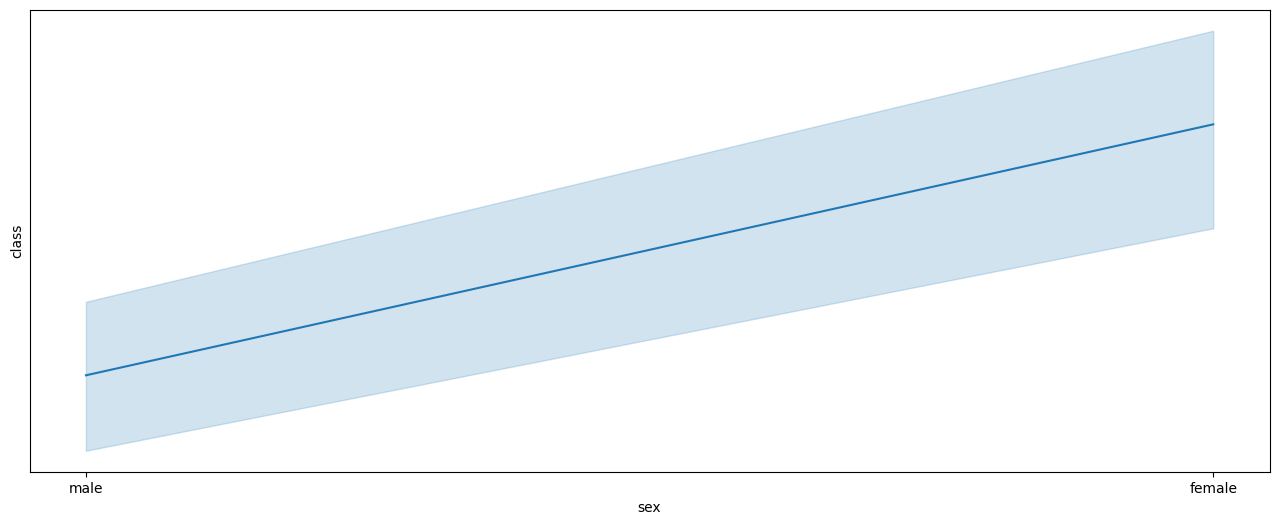

In [28]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=titanic, x="sex", y="class")
plt.show()

In [29]:
class_sex_counts = titanic.groupby(['class', 'sex']).size().unstack(fill_value=0)
print("\nJumlah Penumpang Berdasarkan Kelas dan Jenis Kelamin:")
print(class_sex_counts)


Jumlah Penumpang Berdasarkan Kelas dan Jenis Kelamin:
sex     female  male
class               
First       94   122
Second      76   108
Third      144   347


/tmp/ipython-input-783995743.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_sex_counts = titanic.groupby(['class', 'sex']).size().unstack(fill_value=0)


/tmp/ipython-input-3415073753.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_class_sex = titanic.groupby(['class', 'sex'])['survived'].mean().unstack()


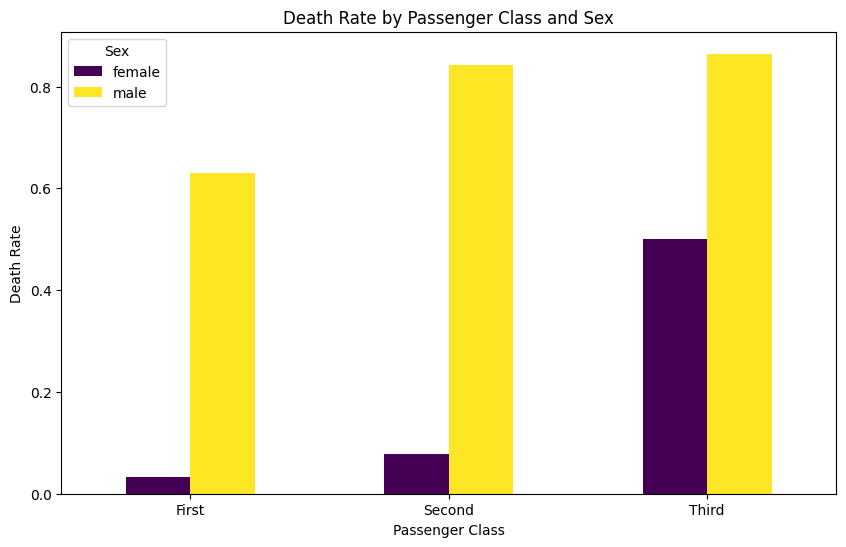

In [30]:
# Calculate the survival rate by class and sex
survival_rate_by_class_sex = titanic.groupby(['class', 'sex'])['survived'].mean().unstack()

# Calculate the death rate by class and sex
death_rate_by_class_sex = 1 - survival_rate_by_class_sex

# Create a grouped bar plot of the death rate
plt.figure(figsize=(10, 6))
death_rate_by_class_sex.plot(kind='bar', ax=plt.gca(), cmap='viridis')
plt.title("Death Rate by Passenger Class and Sex")
plt.xlabel("Passenger Class")
plt.ylabel("Death Rate")
plt.xticks(rotation=0)
plt.legend(title="Sex")
plt.show()

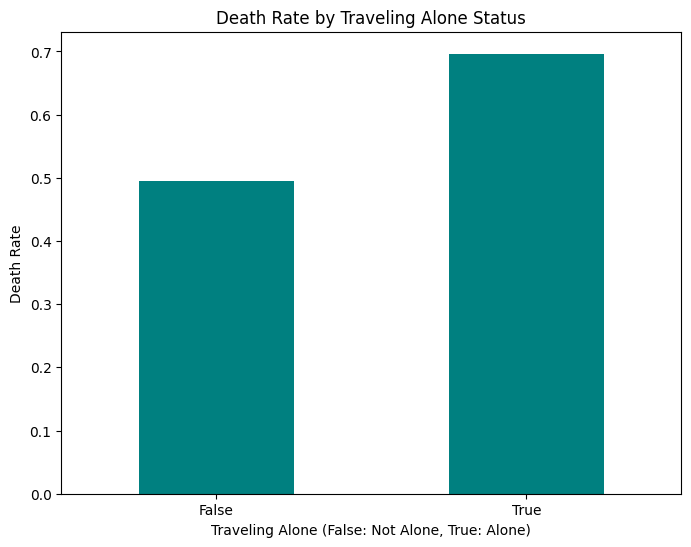

In [31]:
# Calculate the survival rate by whether the passenger was alone or not
survival_rate_by_alone = titanic.groupby('alone')['survived'].mean()

# Calculate the death rate by whether the passenger was alone or not
death_rate_by_alone = 1 - survival_rate_by_alone

# Create a bar plot of the death rate
plt.figure(figsize=(8, 6))
death_rate_by_alone.plot(kind='bar', color='teal')
plt.title("Death Rate by Traveling Alone Status")
plt.xlabel("Traveling Alone (False: Not Alone, True: Alone)")
plt.ylabel("Death Rate")
plt.xticks(rotation=0)
plt.show()

/tmp/ipython-input-361015233.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_rate_by_age_group = titanic.groupby('age_group')['survived'].value_counts(normalize=True).unstack(fill_value=0)[0]


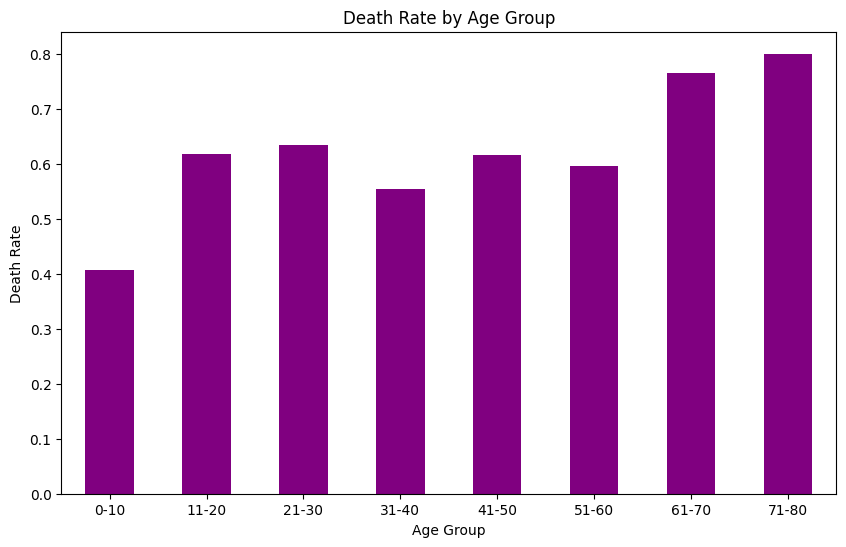

In [32]:
# Create age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
titanic['age_group'] = pd.cut(titanic['age'], bins=age_bins, labels=age_labels, right=True)

# Calculate the death rate by age group
death_rate_by_age_group = titanic.groupby('age_group')['survived'].value_counts(normalize=True).unstack(fill_value=0)[0]

# Create a bar plot of the death rate by age group
plt.figure(figsize=(10, 6))
death_rate_by_age_group.plot(kind='bar', color='purple')
plt.title("Death Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Death Rate")
plt.xticks(rotation=0)
plt.show()


Jumlah Missing Values per Kolom:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
sex_numeric      0
age_group      177
dtype: int64


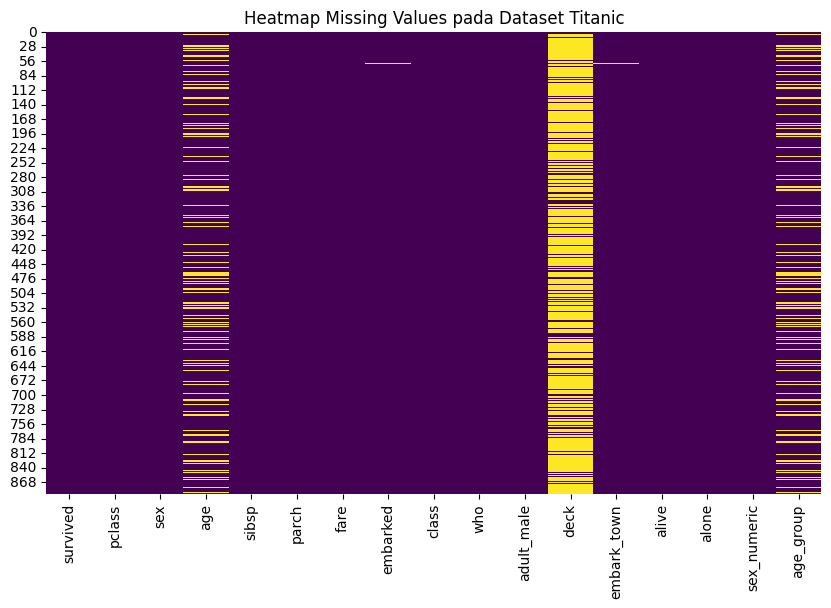

In [33]:
# 3. Analisis Missing Values
# Menghitung jumlah missing values per kolom
missing_values = titanic.isnull().sum()
print("\nJumlah Missing Values per Kolom:")
print(missing_values)

# Visualisasi missing values menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap Missing Values pada Dataset Titanic")
plt.show()

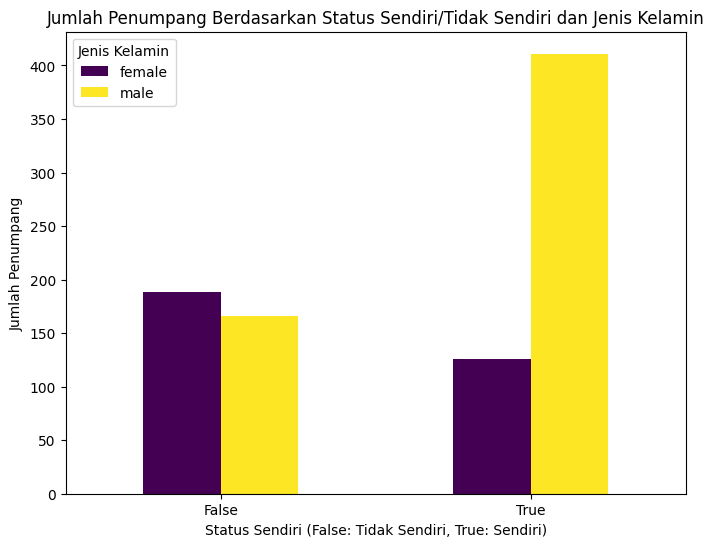

In [34]:
alone_sex_counts.plot(kind='bar', figsize=(8, 6), cmap='viridis')
plt.title("Jumlah Penumpang Berdasarkan Status Sendiri/Tidak Sendiri dan Jenis Kelamin")
plt.xlabel("Status Sendiri (False: Tidak Sendiri, True: Sendiri)")
plt.ylabel("Jumlah Penumpang")
plt.xticks(rotation=0)
plt.legend(title="Jenis Kelamin")
plt.show()

/tmp/ipython-input-2728063282.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=titanic, palette='pastel')


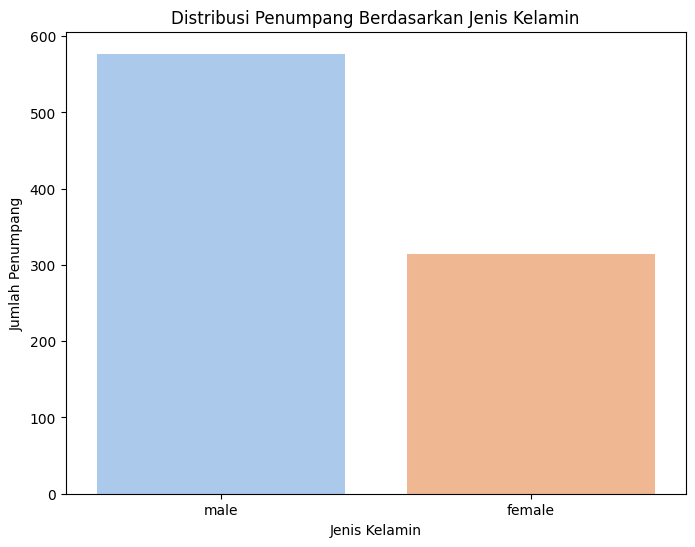

/tmp/ipython-input-2728063282.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=titanic, palette='Set2')


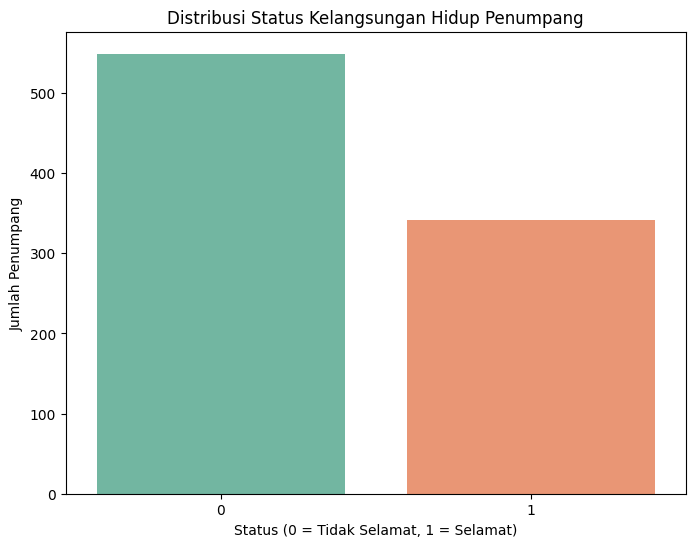

/tmp/ipython-input-2728063282.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=titanic, palette='Set2')


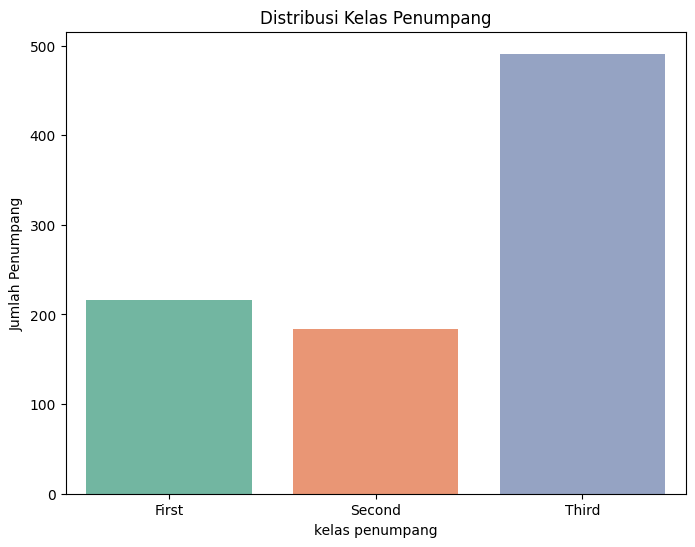

In [35]:
# 4. Analisis Variabel Kategorik
# Distribusi jumlah penumpang berdasarkan jenis kelamin
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=titanic, palette='pastel')
plt.title("Distribusi Penumpang Berdasarkan Jenis Kelamin")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Penumpang")
plt.show()

# Distribusi status kelangsungan hidup (Survived)
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=titanic, palette='Set2')
plt.title("Distribusi Status Kelangsungan Hidup Penumpang")
plt.xlabel("Status (0 = Tidak Selamat, 1 = Selamat)")
plt.ylabel("Jumlah Penumpang")
plt.show()


# Distribusi status kelangsungan hidup (Survived)
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=titanic, palette='Set2')
plt.title("Distribusi Kelas Penumpang")
plt.xlabel("kelas penumpang")
plt.ylabel("Jumlah Penumpang")
plt.show()


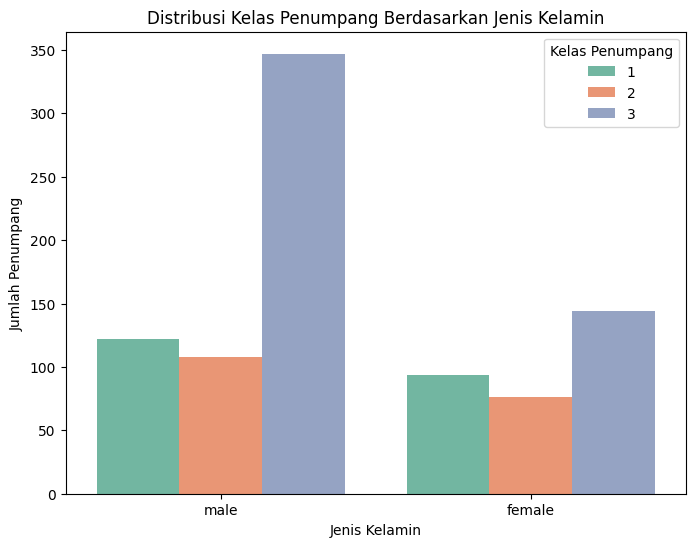

/tmp/ipython-input-1852274996.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='age', data=titanic, palette='Set3')


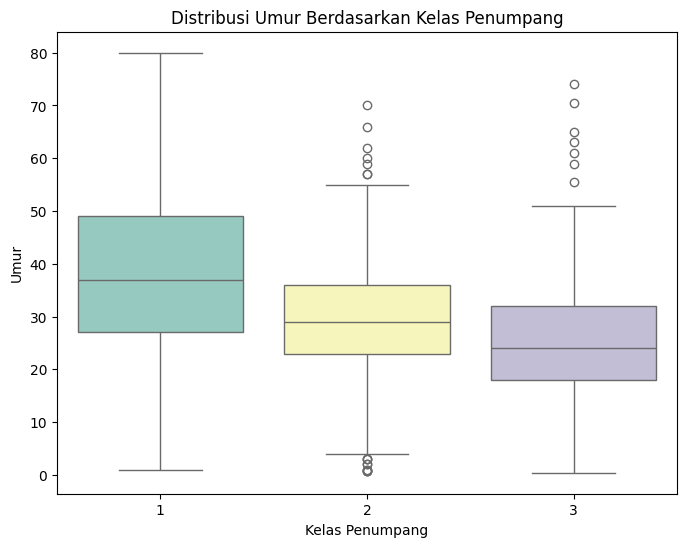

In [36]:
# 5. Analisis Variabel Numerik
# Histogram Distribusi Usia (Age)
plt.figure(figsize=(8, 6))
sns.countplot(x="sex", hue="pclass", data=titanic, palette="Set2")
plt.title("Distribusi Kelas Penumpang Berdasarkan Jenis Kelamin")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Penumpang")
plt.legend(title="Kelas Penumpang")
plt.show()


# Boxplot Umur berdasarkan Kelas Penumpang (pclass)
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='age', data=titanic, palette='Set3')
plt.title("Distribusi Umur Berdasarkan Kelas Penumpang")
plt.xlabel("Kelas Penumpang")
plt.ylabel("Umur")
plt.show()


Matriks Korelasi:
             survived    pclass       age     sibsp     parch      fare  \
survived     1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass      -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age         -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp       -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch        0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare         0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
sex_numeric -0.543351  0.131900  0.093254 -0.114631 -0.245489 -0.182333   

             sex_numeric  
survived       -0.543351  
pclass          0.131900  
age             0.093254  
sibsp          -0.114631  
parch          -0.245489  
fare           -0.182333  
sex_numeric     1.000000  


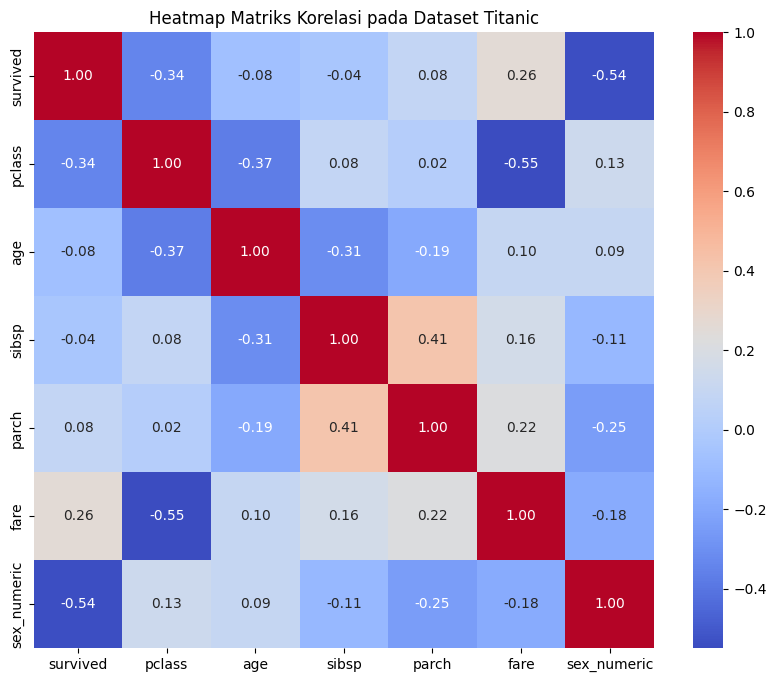

In [37]:
# 6. Analisis Korelasi antar Variabel Numerik
# Hanya memilih kolom numerik agar tidak terjadi error konversi
numeric_data = titanic.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
print("\nMatriks Korelasi:")
print(correlation_matrix)

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Matriks Korelasi pada Dataset Titanic")
plt.show()

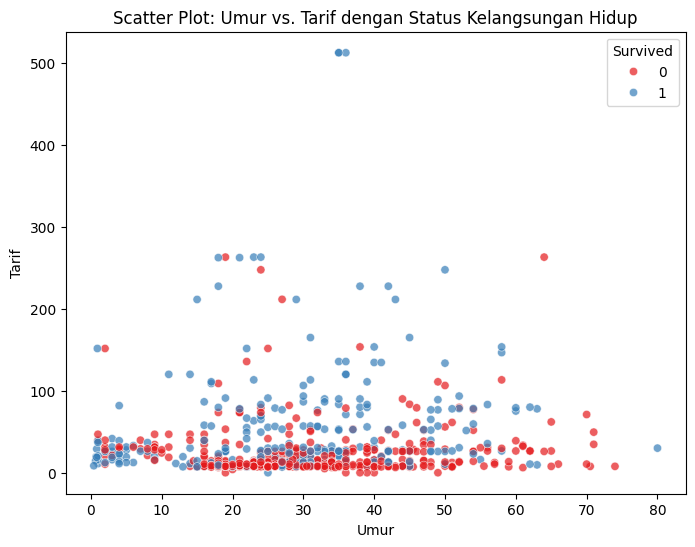

In [38]:
# 7. Visualisasi Hubungan Antar Variabel
# Scatter Plot: Hubungan antara Umur (age) dan Tarif (fare)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', data=titanic, hue='survived', palette='Set1', alpha=0.7)
plt.title("Scatter Plot: Umur vs. Tarif dengan Status Kelangsungan Hidup")
plt.xlabel("Umur")
plt.ylabel("Tarif")
plt.legend(title="Survived", loc="upper right")
plt.show()

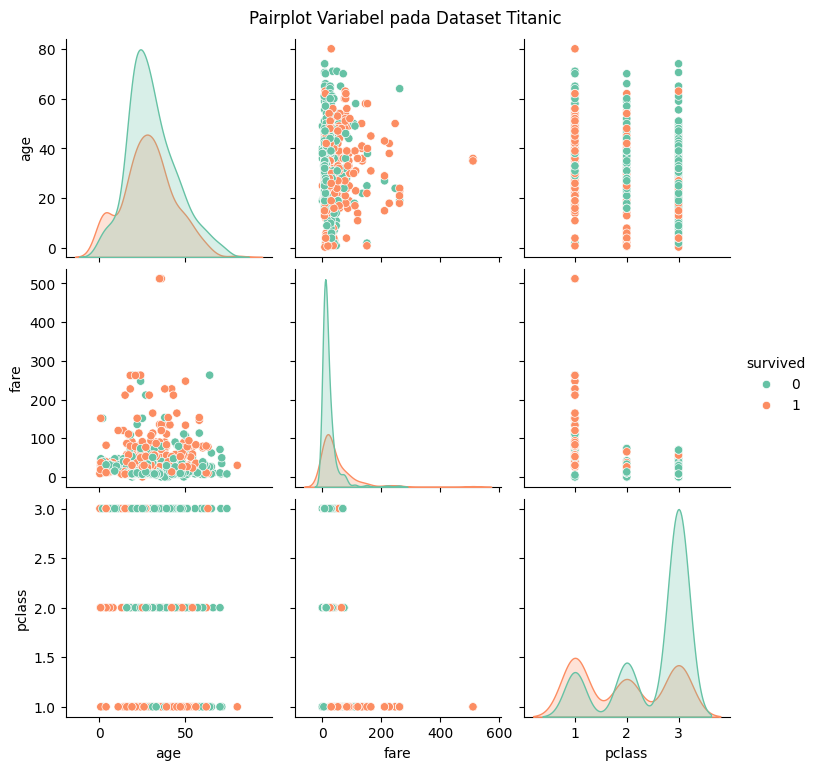

In [39]:
# 8. Analisis Lanjutan: Pairplot
# Pairplot untuk melihat hubungan antar variabel numerik dan kategorik secara menyeluruh
sns.pairplot(titanic, hue='survived', palette='Set2', vars=['age', 'fare', 'pclass'])
plt.suptitle("Pairplot Variabel pada Dataset Titanic", y=1.02)
plt.show()

# 9. Kesimpulan Sementara dari EDA:
# - Dataset Titanic memiliki beberapa missing values, terutama pada kolom 'age', 'deck', dan 'embark_town'.
# - Distribusi penumpang tampak berbeda berdasarkan jenis kelamin dan status kelangsungan hidup.
# - Variabel 'fare' dan 'age' memiliki sebaran yang cukup bervariasi, dengan outlier yang terlihat di boxplot.
# - Matriks korelasi menunjukkan adanya korelasi antara variabel numerik tertentu, misalnya antara 'fare' dan 'pclass'.
# - Visualisasi hubungan (scatter plot dan pairplot) memberikan wawasan tentang interaksi antar variabel dan perbedaan antara penumpang yang selamat dan tidak.

/tmp/ipython-input-1841079673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex_numeric', y='survived', data=titanic, palette='viridis')


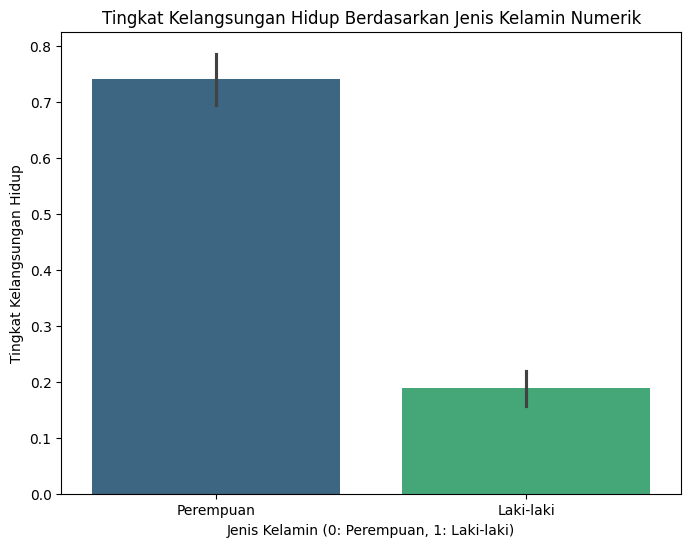

In [40]:
# Visualisasi hubungan antara sex_numeric dan survived
plt.figure(figsize=(8, 6))
sns.barplot(x='sex_numeric', y='survived', data=titanic, palette='viridis')
plt.title("Tingkat Kelangsungan Hidup Berdasarkan Jenis Kelamin Numerik")
plt.xlabel("Jenis Kelamin (0: Perempuan, 1: Laki-laki)")
plt.ylabel("Tingkat Kelangsungan Hidup")
plt.xticks([0, 1], ['Perempuan', 'Laki-laki']) # Mengganti label sumbu x
plt.show()